In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
pip install ucimlrepo

In [107]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [108]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [109]:
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [110]:
np.shape(X)

(4898, 11)

In [111]:
np.shape(y)

(4898, 1)

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


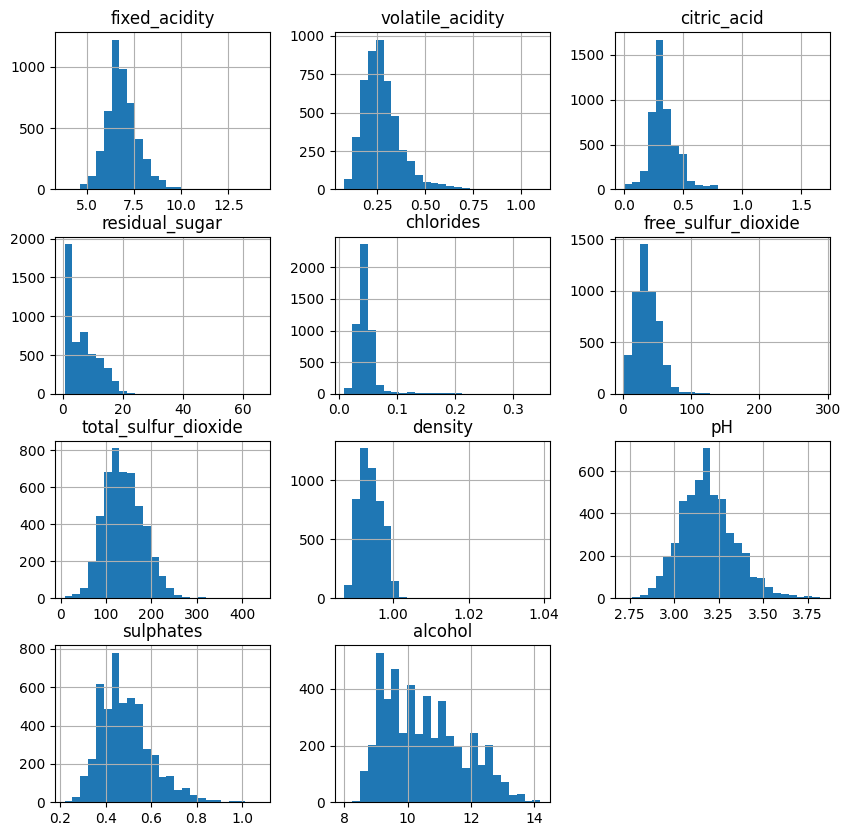

In [113]:
X.hist(bins=25,figsize=(10,10))
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
import statsmodels.api as sm

In [116]:
# Fit the ordinal logistic regression model
ordinal_model = sm.OLS(y_train, X_train).fit()

In [117]:
# Predict the wine quality
y_pred = ordinal_model.predict(X_test)

# Calculate the cumulative accuracy
predicted_bins = np.round(y_pred)
accuracy = accuracy_score(y_test, predicted_bins)
# confusion = confusion_matrix(y_test, predicted_bins)

# print(f"Cumulative Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(confusion)

In [118]:
print(f"the accuracy for ordianl {accuracy}")

the accuracy for ordianl 0.5


In [119]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
Y_pred = model.predict(X_test)

In [121]:
predicted_Bins = np.round(Y_pred)
accuracy01 = accuracy_score(y_test, predicted_Bins)

In [122]:
r2_1 = r2_score(y_test,y_pred)
r2_2 = r2_score(y_test,Y_pred)
print(f"ordinal r2 score is {r2_2}---------linear r2 score is {r2_1}")

ordinal r2 score is 0.2837151179790882---------linear r2 score is 0.2719107707970412
